<a href="https://colab.research.google.com/github/basleal22/baslealwork/blob/main/02_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

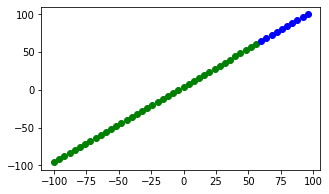

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
a=tf.range(-100,100,4)
b=a+4
a_train=a[:40]
b_train=b[:40]
a_test=a[40:]
b_test=b[40:]
plt.figure(figsize=(5,3))
plt.scatter(a_train,b_train,c="g",label="training model")
plt.scatter(a_test,b_test,c="b",label="test model")

In [51]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            metrics=["mae"])
model_1.fit(tf.expand_dims(a_train, axis=-1),b_train,epochs=1000,verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 9ms/step - loss: 43.1068 - mae: 43.1068
Epoch 2/1000
2/2 [==============================] - 0s 10ms/step - loss: 42.7231 - mae: 42.7231
Epoch 3/1000
2/2 [==============================] - 0s 10ms/step - loss: 42.3561 - mae: 42.3561
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 41.9856 - mae: 41.9856
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 41.6254 - mae: 41.6254
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 41.2781 - mae: 41.2781
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 40.9287 - mae: 40.9287
Epoch 8/1000
2/2 [==============================] - 0s 7ms/step - loss: 40.5658 - mae: 40.5658
Epoch 9/1000
2/2 [==============================] - 0s 9ms/step - loss: 40.2286 - mae: 40.2286
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 39.8924 - mae: 39.8924
Epoch 11/1000
2/2 [============================

In [52]:
y_pred=model_1.predict([a_test])
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 64.5311 ],
       [ 68.65476],
       [ 72.78561],
       [ 76.91646],
       [ 81.04731],
       [ 85.17814],
       [ 89.30898],
       [ 93.43984],
       [ 97.57068],
       [101.70153]], dtype=float32)

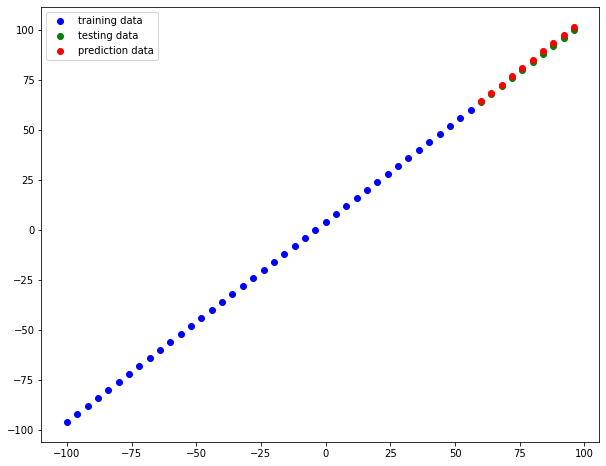

In [53]:
def plot_predications(train_data=a_train,train_label=b_train,test_data=a_test,test_label=b_test,prediction=y_pred):
  plt.figure(figsize=(10,8))
  plt.scatter(train_data,train_label,c="b",label="training data")
  plt.scatter(test_data,test_label,c="g",label="testing data")
  plt.scatter(test_data,prediction,c="r",label="prediction data")
  plt.legend();
plot_predications()


In [54]:
model_1.save("first_model")

save model using the hdf5 model

In [55]:
model_1.save("first_model_HDF5_format.h5")

load in the savedmodel format model

In [61]:
load_savedmodel_format=tf.keras.models.load_model("first_model")
load_savedmodel_format.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               200       
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_predict=model_1.predict(a_test)
load_savedmodel_format_predict=load_savedmodel_format.predict(a_test)
model_predict==load_savedmodel_format_predict




1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
loaded_h5_model=tf.keras.models.load_model("/content/first_model_HDF5_format.h5")

In [71]:
loaded_h5_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               200       
                                                                 
 dense_54 (Dense)            (None, 100)               10100     
                                                                 
 dense_55 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [72]:
from google.colab import files
files.download("/content/first_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
!cp /content/first_model_HDF5_format.h5 /content/drive/MyDrive/google_colab_exercises

In [75]:
!ls /content/drive/MyDrive/google_colab_exercises

first_model_HDF5_format.h5
